In [188]:
import pandas as pd
import dataframe_image as dfi

In [189]:
df=pd.read_excel('england-premier-league-matches-2018-to-2019-stats.xlsx')#Creating a pandas dataframe using the excel file
df

,date_GMT,attendance,home_team_name,away_team_name,referee,Game Week,total_goal_count,home_team_goal_count,away_team_goal_count,stadium_name
0,Aug 10 2018 - 7:00pm,74439.0,Manchester United,Leicester City,Andre Marriner,1.0,3.0,2.0,1.0,Old Trafford (Manchester)
1,Aug 11 2018 - 11:30am,51749.0,Newcastle United,Tottenham Hotspur,Martin Atkinson,1.0,3.0,1.0,2.0,St. James' Park (Newcastle upon Tyne)
2,Aug 11 2018 - 2:00pm,10353.0,AFC Bournemouth,Cardiff City,Kevin Friend,1.0,2.0,2.0,0.0,Vitality Stadium (Bournemouth- Dorset)
3,Aug 11 2018 - 2:00pm,24821.0,Fulham,Crystal Palace,Mike Dean,1.0,2.0,0.0,2.0,Craven Cottage (London)
4,Aug 11 2018 - 2:00pm,24121.0,Huddersfield Town,Chelsea,Chris Kavanagh,1.0,3.0,0.0,3.0,John Smith's Stadium (Huddersfield- West Yorks...
...,...,...,...,...,...,...,...,...,...,...
375,May 12 2019 - 2:00pm,53331.0,Liverpool,Wolverhampton Wanderers,Martin Atkinson,38.0,2.0,2.0,0.0,Anfield (Liverpool)
376,May 12 2019 - 2:00pm,74457.0,Manchester United,Cardiff City,Jonathan Moss,38.0,2.0,0.0,2.0,Old Trafford (Manchester)
377,May 12 2019 - 2:00pm,30367.0,Southampton,Huddersfield Town,Lee Probert,38.0,2.0,1.0,1.0,St. Mary's Stadium (Southampton- Hampshire)
378,May 12 2019 - 2:00pm,60124.0,Tottenham Hotspur,Everton,Andre Marriner,38.0,4.0,2.0,2.0,Tottenham Hotspur Stadium (London)


In [190]:
goal_count=df['total_goal_count']
n=len(goal_count)
print('Total number of matches:',n)
print(goal_count)

Total number of matches: 380
0      3.0
1      3.0
2      2.0
3      2.0
4      3.0
      ... 
375    2.0
376    2.0
377    2.0
378    4.0
379    5.0
Name: total_goal_count, Length: 380, dtype: float64


In [191]:
sum_goals=0
for i in range(len(goal_count)):
    sum_goals+=goal_count[i]
rate=sum_goals/n
rate # value of 𝜆

2.8210526315789473

In [192]:
d={}
#Creating a dictionary with X=number of goals as keys and the frequencies as values
for i in range(len(goal_count)):
    if int(goal_count[i]) not in d:
        d[int(goal_count[i])]=0
    d[int(goal_count[i])]+=1
#Creating a dataframe with the headers given below and storing its image locally
headers=['Number of goals','Number of matches']
l=sorted(d.keys())
d_goal_frequency={'Number of goals':[key for key in l],'Number of matches':[d[key] for key in l]}
df_goal_frequency=pd.DataFrame(d_goal_frequency)
dfi.export(df_goal_frequency,'goal_frequency.png')
print(df_goal_frequency)


[1012/072413.798481:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/: Operation not permitted (1)
[1012/072413.799657:ERROR:file_io.cc(91)] ReadExactly: expected 8, observed 0
[1012/072413.800370:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/: Operation not permitted (1)
[1012/072414.369603:INFO:headless_shell.cc(653)] Written to file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/tmpmos_iqok/temp.png.


   Number of goals  Number of matches
0                0                 22
1                1                 55
2                2                 99
3                3                 84
4                4                 65
5                5                 32
6                6                 16
7                7                  5
8                8                  2


# Calculation of Experimental Probability

In [193]:
#Creating a dictionary with values of X as keys and the corresponding probabilities as values
d={num_goals:(num_matches/n) for num_goals,num_matches in d.items()}
d

{3: 0.22105263157894736,
 2: 0.26052631578947366,
 4: 0.17105263157894737,
 0: 0.05789473684210526,
 5: 0.08421052631578947,
 7: 0.013157894736842105,
 1: 0.14473684210526316,
 6: 0.042105263157894736,
 8: 0.005263157894736842}

## Calculation of $\lambda$

In [194]:
sum_goals=0
for i in range(len(goal_count)):
    sum_goals+=goal_count[i]
rate=sum_goals/n
print('\u03BB =',rate) 

λ = 2.8210526315789473


# Calculation of Probabilities using Poisson distribution

In [195]:
#Creating a dictionary with values of X as keys and the corresponding theoretical probabilities as values
#calculated using Pois(𝜆) distribution with  𝜆 = 2.8210526315789473
d_poisson={}
for key in d:
    d_poisson[key]=(np.exp(-rate)*rate**key)/np.math.factorial(int(key))
d_poisson

{3: 0.22279976313096386,
 2: 0.23693258392658473,
 4: 0.15713246452394294,
 0: 0.059543232622450086,
 5: 0.08865579051035095,
 7: 0.016798874812334646,
 1: 0.16797459308228024,
 6: 0.041683775187322906,
 8: 0.005923813749612743}

# Plots

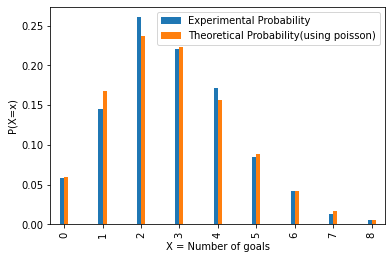

In [196]:
comp_df=pd.DataFrame()
headers=['X=Number of Goals', 'Experimental Probability','Theoretical Probability(using poisson)']
observations=sorted(d.keys())
comp_d={header:[] for header in headers}
comp_d['X=Number of Goals']=observations
comp_d['Experimental Probability']=[d[key] for key in observations]
comp_d['Theoretical Probability(using poisson)']=[d_poisson[key] for key in observations]
comp_df=pd.DataFrame(comp_d)
plot=comp_df.plot.bar(x="X=Number of Goals", y=["Experimental Probability", 'Theoretical Probability(using poisson)'],width=0.21)
plt.xlabel('X = Number of goals')
plt.ylabel('P(X=x)')
fig = plot.get_figure()
fig.savefig("output.png")

In [197]:
#Storing the dataframe image locally
import pandas as pd
import dataframe_image as dfi
dfi.export(comp_df, 'dataframe.png')
comp_df

[1012/072418.960257:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/: Operation not permitted (1)
[1012/072418.960917:ERROR:file_io.cc(91)] ReadExactly: expected 8, observed 0
[1012/072418.961660:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/: Operation not permitted (1)
[1012/072419.516064:INFO:headless_shell.cc(653)] Written to file /var/folders/dv/8fd5wvd51f943n2b5_n527880000gn/T/tmpttudwixy/temp.png.


,X=Number of Goals,Experimental Probability,Theoretical Probability(using poisson)
0,0,0.057895,0.059543
1,1,0.144737,0.167975
2,2,0.260526,0.236933
3,3,0.221053,0.222800
4,4,0.171053,0.157132
5,5,0.084211,0.088656
6,6,0.042105,0.041684
7,7,0.013158,0.016799
8,8,0.005263,0.005924


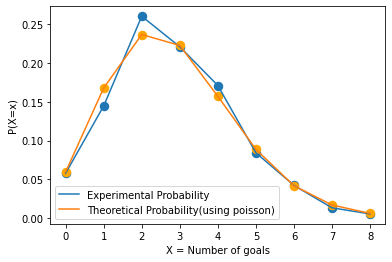

In [201]:
import matplotlib.pyplot as plt
ax1=comp_df.plot(x="X=Number of Goals", y=["Experimental Probability", 'Theoretical Probability(using poisson)'])
ax2=comp_df.plot.scatter(x="X=Number of Goals", y="Experimental Probability", linewidth=5, ax=ax1)
ax3=comp_df.plot.scatter(x="X=Number of Goals", y='Theoretical Probability(using poisson)', color='orange', linewidth=5, ax=ax2)
plt.xlabel('X = Number of goals')
plt.ylabel('P(X=x)')
fig = ax1.get_figure()
fig.savefig("output2.png")

